In [1]:
import pandas as pd

# What trends exist in movies released post-pandemic? 

In March 2020, regulations related to the pandemic shut down movie theaters and dramatically changed movie consumer habits. Looking at movie trends from 2020 and 2021 can gain insite into new consumer habits and set up a movie studio for success. 

## 1. Explore given data sets to determine relevant years. 

In [2]:
#read file
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [3]:
#epxlore firts few rows 
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#years is a column name
#determine the range of years in data set and their counts
bom['year'].value_counts().sort_index()

2010    328
2011    399
2012    400
2013    350
2014    395
2015    450
2016    436
2017    321
2018    308
Name: year, dtype: int64

Data provided for this project is from 2010-2018. This data will not gain insite to post-pandemic trends. I will download and analyaze newer data. 

## 2. Download new data sets. 

Downloaded data from https://www.imdb.com/interfaces/
(title.akas.tsv.gz, title.basics.tsv.gz, title.ratings.tsv.gz) in order to contain more recent movies.

In [5]:
#read new data
newdata= pd.read_csv('title.basics.tsv.gz', delimiter= '\t', low_memory=False)

In [6]:
#explore columns
newdata.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [7]:
#explore size
newdata.shape

(8263105, 9)

In [8]:
newdata['startYear'].value_counts()
# explore range of years
# many null values in start year

\N      975895
2018    403796
2017    400122
2019    386265
2016    378929
         ...  
1877         1
1882         1
1883         1
1874         1
1885         1
Name: startYear, Length: 150, dtype: int64

In [9]:
newdata['endYear'].value_counts()
# explore range of years
# many null values in end years

\N      8181033
2017       5379
2018       5318
2019       4958
2020       4397
         ...   
1935          1
2027          1
2025          1
1944          1
2028          1
Name: endYear, Length: 96, dtype: int64

In [10]:
newdata.tail()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8263100,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8263101,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8263102,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8263103,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short
8263104,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0,2014,\N,10,"Animation,Comedy,Family"


In [11]:
newdata.info()
# explore type(s) of data within data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8263105 entries, 0 to 8263104
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 567.4+ MB


In [12]:
newdata['titleType'].value_counts()
# explore types of media contained in data set

tvEpisode       6062444
short            830683
movie            587753
video            321244
tvSeries         214708
tvMovie          132930
tvMiniSeries      39722
tvSpecial         34136
videoGame         29208
tvShort           10274
radioEpisode          1
radioSeries           1
tvPilot               1
Name: titleType, dtype: int64

For the purposes of this EDA I'm interested in only the movies from March 2020 - present. Filtering the data to explore only **movies** from **2020 - 20201**

In [13]:
# filter new data to explore only movies. movie dataframe (md)
md = newdata[newdata['titleType'] == 'movie']

In [14]:
md.shape

(587753, 9)

In [15]:
md.head(2)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"


In [16]:
md.tail(2)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8263044,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N
8263055,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,\N,49,Documentary


Based on these DataFrames, 'startYear' is the year used for movies not 'endYear'

In [17]:
#confirm that 'endYear' is not a relevant field for movies
md['endYear'].value_counts()

\N    587753
Name: endYear, dtype: int64

In [18]:
#filter for only movies in 2020 and 2021 to create a 
#recent movies (rm) DataFrame

md = md.loc[(md['startYear']=='2020') | (md['startYear']=='2021')]

The client, is not interested in creating adult content. Filtering for only non-adult content

In [19]:
md.shape

(28634, 9)

In [20]:
# remove adult movies by keeping all 0s in the list
md = md[md['isAdult'] != '1']

In [21]:
#confirm adult movies were removed. There are ~200 fewer results
md.shape

(28412, 9)

In [22]:
# confirm only 'non-adult' values remain
md['isAdult'].value_counts()

0    28412
Name: isAdult, dtype: int64

The DataFrame now contains movies from the relevant years. To gleam a better picture of what consumers want post-pandemic, merge with other data sets. 


## 3. Merge to create a comprehensive DataFrame of post-pandemic movies

In [23]:
# read 'ratings' file which contains additional data points
ratings = pd.read_csv('title.ratings.tsv.gz', delimiter='\t', low_memory=False)

In [24]:
# merge md and ratings
movie_merge = md.set_index('tconst').join(ratings.set_index('tconst'), how='left')

In [25]:
# removing irrelevant columns 
movie_merge = movie_merge.drop(['isAdult', 'endYear', 'titleType'], axis = 1)

In [26]:
movie_merge.shape

(28412, 7)

The movie_merge list contains international and domestic movies. 

In [27]:
# read title.akas.tsv file to bring in additional data points, most relevant is 'region'
region = pd.read_csv('title.akas.tsv.gz', delimiter='\t', low_memory=False)

In [28]:
region.shape

(29093971, 8)

In [29]:
region.columns

Index(['titleId', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')

In [30]:
#filter region for only US markets
region = region[region['region']=='US']

In [31]:
region.shape

(1291346, 8)

In [32]:
#merge filtered region list with inner join so our final DataFrame contains movies from 2020 and 2021 in the US
movie_merge = movie_merge.join(region.set_index('titleId'), how='inner')

In [33]:
movie_merge.shape

(16400, 14)

## 4. Clean the merged data

In [34]:
movie_merge.head()

,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle
tt0062336,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,2020,70,Drama,6.3,150.0,4,The Tango of the Widower and Its Distorting Mi...,US,\N,imdbDisplay,\N,0
tt0065392,Bucharest Memories,Amintiri bucurestene,2020,\N,Documentary,7.3,11.0,3,Bucharest Memories,US,\N,imdbDisplay,\N,0
tt0093119,Grizzly II: Revenge,Grizzly II: The Predator,2020,74,"Horror,Music,Thriller",3.3,770.0,13,Grizzly II: Revenge,US,\N,imdbDisplay,\N,0
tt0093119,Grizzly II: Revenge,Grizzly II: The Predator,2020,74,"Horror,Music,Thriller",3.3,770.0,3,Predator: The Concert,US,\N,\N,bootleg title,0
tt0093119,Grizzly II: Revenge,Grizzly II: The Predator,2020,74,"Horror,Music,Thriller",3.3,770.0,5,Grizzly II: The Predator,US,\N,alternative,\N,0


In [35]:
#notice there are duplicte entries of of item tt0093119. 
#explore and determine how to clean duplicates
movie_merge.loc['tt0093119']

,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle
tt0093119,Grizzly II: Revenge,Grizzly II: The Predator,2020,74,"Horror,Music,Thriller",3.3,770.0,13,Grizzly II: Revenge,US,\N,imdbDisplay,\N,0
tt0093119,Grizzly II: Revenge,Grizzly II: The Predator,2020,74,"Horror,Music,Thriller",3.3,770.0,3,Predator: The Concert,US,\N,\N,bootleg title,0
tt0093119,Grizzly II: Revenge,Grizzly II: The Predator,2020,74,"Horror,Music,Thriller",3.3,770.0,5,Grizzly II: The Predator,US,\N,alternative,\N,0


In [36]:
movie_merge = movie_merge.reset_index()

In [37]:
movie_merge = movie_merge.rename(columns={'index':'tconst'})

In [38]:
movie_merge['tconst'].value_counts()

tt5955540     6
tt13009892    6
tt8145202     6
tt10327252    4
tt2401814     4
             ..
tt7476336     1
tt11545410    1
tt12147360    1
tt11014432    1
tt13723564    1
Name: tconst, Length: 15581, dtype: int64

In [39]:
movie_merge[movie_merge['tconst']=='tt5955540']

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle
13490,tt5955540,The Thousand and One Lives of Doctor Mabuse,The Thousand and One Lives of Doctor Mabuse,2020,\N,"Mystery,Thriller",NaN,NaN,1,Doctor Mabuse A.D. 1984,US,\N,working,\N,0
13491,tt5955540,The Thousand and One Lives of Doctor Mabuse,The Thousand and One Lives of Doctor Mabuse,2020,\N,"Mystery,Thriller",NaN,NaN,2,Mabuse Lives,US,\N,working,\N,0
13492,tt5955540,The Thousand and One Lives of Doctor Mabuse,The Thousand and One Lives of Doctor Mabuse,2020,\N,"Mystery,Thriller",NaN,NaN,3,The Thousand and One Lives of Doctor Mabuse,US,\N,imdbDisplay,\N,0
13493,tt5955540,The Thousand and One Lives of Doctor Mabuse,The Thousand and One Lives of Doctor Mabuse,2020,\N,"Mystery,Thriller",NaN,NaN,4,Doctor Mabuse: Ruler of Ashes,US,\N,\N,fake working title,0
13494,tt5955540,The Thousand and One Lives of Doctor Mabuse,The Thousand and One Lives of Doctor Mabuse,2020,\N,"Mystery,Thriller",NaN,NaN,5,Doctor Mabuse 3,US,\N,\N,pre-release title,0
13495,tt5955540,The Thousand and One Lives of Doctor Mabuse,The Thousand and One Lives of Doctor Mabuse,2020,\N,"Mystery,Thriller",NaN,NaN,7,Doctor Mabuse AD,US,\N,working,\N,0


In [40]:
movie_merge[movie_merge['tconst']=='tt2401814']

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle
12606,tt2401814,The Loneliest Whale: The Search for 52,The Loneliest Whale: The Search for 52,2021,96,"Adventure,Documentary",6.8,166.0,1,Finding 52: The Search for the Loneliest Whale...,US,\N,working,\N,0
12607,tt2401814,The Loneliest Whale: The Search for 52,The Loneliest Whale: The Search for 52,2021,96,"Adventure,Documentary",6.8,166.0,3,52: The Search for the Loneliest Whale in the ...,US,en,working,\N,0
12608,tt2401814,The Loneliest Whale: The Search for 52,The Loneliest Whale: The Search for 52,2021,96,"Adventure,Documentary",6.8,166.0,5,Finding 52,US,\N,working,\N,0
12609,tt2401814,The Loneliest Whale: The Search for 52,The Loneliest Whale: The Search for 52,2021,96,"Adventure,Documentary",6.8,166.0,8,The Loneliest Whale: The Search for 52,US,\N,\N,\N,0


In [41]:
#one entry isn't preferable to others. 
#keep the first appearance 
movie_merge = movie_merge.drop_duplicates(subset=['tconst'], keep='first')

In [42]:
movie_merge.shape

(15581, 15)

In [43]:
movie_merge.columns

Index(['tconst', 'primaryTitle', 'originalTitle', 'startYear',
       'runtimeMinutes', 'genres', 'averageRating', 'numVotes', 'ordering',
       'title', 'region', 'language', 'types', 'attributes',
       'isOriginalTitle'],
      dtype='object')

In [44]:
#keep only relevant columns
movie_merge = movie_merge.drop(columns=['ordering', 'region', 'language', 'types', 'attributes','isOriginalTitle'])

In [45]:
#remove entries that do not contain ratings
movie_merge = movie_merge.dropna(subset=['averageRating'])

In [46]:
movie_merge.sort_values(by=['numVotes'], ascending=False)

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,title
13859,tt6723592,Tenet,Tenet,2020,150,"Action,Sci-Fi,Thriller",7.4,417671.0,Tenet
4920,tt12361974,Zack Snyder's Justice League,Zack Snyder's Justice League,2021,242,"Action,Adventure,Fantasy",8.1,334175.0,The Snyder Cut
12672,tt2948372,Soul,Soul,2020,100,"Adventure,Animation,Comedy",8.1,276210.0,Soul
14070,tt7126948,Wonder Woman 1984,Wonder Woman 1984,2020,151,"Action,Adventure,Fantasy",5.4,228845.0,Wonder Woman 2
12788,tt3480822,Black Widow,Black Widow,2021,134,"Action,Adventure,Sci-Fi",6.8,209559.0,Blue Bayou
...,...,...,...,...,...,...,...,...,...
7706,tt13344348,Headless,Bisar,2020,93,Drama,6.2,5.0,Headless
1428,tt10867576,An Exquisite Meal,An Exquisite Meal,2020,\N,"Comedy,Thriller",4.4,5.0,An Exquisite Meal
13803,tt6626798,Around Rocha's Table,Távola de Rocha,2021,94,Documentary,3.8,5.0,Around Rocha's Table
4257,tt12059646,Anonymous Vol. 1 - The Dreamland Adventures th...,Anonymous Vol. 1 - The Dreamland Adventures th...,2020,\N,"Action,Adventure,Mystery",7.8,5.0,Anonymous Vol. 1 - The Dreamland Adventures th...


In [47]:
movie_merge['comparison'] = (movie_merge['originalTitle'] == movie_merge['primaryTitle'])

In [48]:
movie_merge['comparison'].value_counts(normalize=True)

True     0.773866
False    0.226134
Name: comparison, dtype: float64

## Is there a relationship between genre and rating/number of votes in post-pandemic movies? 

In [49]:
import matplotlib.pyplot as plt

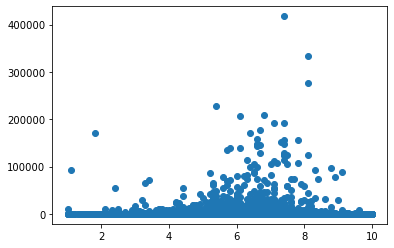

In [50]:
#is there a relationship between averageRating and numVotes?
fig, ax = plt.subplots()
ax.scatter(x= movie_merge['averageRating'], y= movie_merge['numVotes'])

## Is there a trend between genre and imdb ratings? 

In [51]:
#is there a trend of ratings by genre? 
movie_merge['genres'].value_counts()

Drama                         1216
Documentary                   1198
Comedy                         438
Horror                         393
Thriller                       301
                              ... 
Biography,Crime,Western          1
Biography,Comedy                 1
Crime,Documentary,Thriller       1
Action,Fantasy,Romance           1
Adventure,Comedy,Musical         1
Name: genres, Length: 464, dtype: int64

In [52]:
movie_merge[movie_merge['genres']=='Drama'].describe()

,averageRating,numVotes
count,1216.000000,1216.000000
mean,6.306086,803.127467
std,1.408357,5979.936026
min,1.000000,5.000000
25%,5.600000,21.000000
50%,6.400000,56.000000
75%,7.100000,167.000000
max,10.000000,124853.000000


In [53]:
movie_merge[movie_merge['genres']=='Comedy'].describe()

,averageRating,numVotes
count,438.000000,438.000000
mean,5.673973,960.821918
std,1.601546,7058.163082
min,1.200000,5.000000
25%,4.600000,27.000000
50%,5.700000,73.000000
75%,6.700000,260.000000
max,10.000000,129535.000000


In [54]:
movie_merge[movie_merge['genres']=='Action'].describe()

,averageRating,numVotes
count,90.000000,90.000000
mean,5.636667,409.288889
std,1.980378,1173.322941
min,1.900000,5.000000
25%,4.150000,23.000000
50%,6.050000,80.000000
75%,6.900000,302.250000
max,9.900000,9356.000000


In [55]:
genres = movie_merge[['genres', 'averageRating', 'numVotes']]
genres

,genres,averageRating,numVotes
0,Drama,6.3,150.0
1,Documentary,7.3,11.0
2,"Horror,Music,Thriller",3.3,770.0
5,"Action,Adventure,Fantasy",6.1,138331.0
11,Documentary,6.6,8.0
...,...,...,...
16392,War,4.5,1386.0
16393,Horror,5.9,194.0
16396,"Comedy,Drama",7.6,3161.0
16398,"Action,Adventure,Thriller",3.6,222.0


In [56]:
splitgenres = genres['genres'].str.split(",", expand = True)
genres['g1']= splitgenres[0]
genres['g2']= splitgenres[1]
genres['g3']= splitgenres[2]

genres

<ipython-input-56-469bf650dd3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres['g1']= splitgenres[0]
<ipython-input-56-469bf650dd3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres['g2']= splitgenres[1]
<ipython-input-56-469bf650dd3f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,genres,averageRating,numVotes,g1,g2,g3
0,Drama,6.3,150.0,Drama,None,None
1,Documentary,7.3,11.0,Documentary,None,None
2,"Horror,Music,Thriller",3.3,770.0,Horror,Music,Thriller
5,"Action,Adventure,Fantasy",6.1,138331.0,Action,Adventure,Fantasy
11,Documentary,6.6,8.0,Documentary,None,None
...,...,...,...,...,...,...
16392,War,4.5,1386.0,War,None,None
16393,Horror,5.9,194.0,Horror,None,None
16396,"Comedy,Drama",7.6,3161.0,Comedy,Drama,None
16398,"Action,Adventure,Thriller",3.6,222.0,Action,Adventure,Thriller


In [57]:
#frankenstein merge because idk
#split genre so each genre is associated with the movies' average rating and numVotes.
#drop empty genre cells from g2 and g3
g1 = genres[['averageRating', 'numVotes','g1']].dropna().rename(columns={'g1':'genre'})

In [58]:
g2 = genres[['averageRating', 'numVotes','g2']].dropna().rename(columns={'g2':'genre'})

In [59]:
g3 = genres[['averageRating', 'numVotes','g3']].dropna().rename(columns={'g3':'genre'})

In [60]:
#create one table of ratings and genre 
genre_and_ratings = [g1, g2, g3]
genre = pd.concat(genre_and_ratings)
genre['genre'].isna().value_counts()

False    12823
Name: genre, dtype: int64

In [61]:
genre_counts = genre['genre'].value_counts()

In [62]:
genre = genre[~genre['genre'].isin(genre_counts[genre_counts < 200].index)]
top_10 = list(genre['genre'].value_counts().index[:10])

In [63]:
rating = genre[['averageRating', 'genre']]

#### Visual analysis - average ratings by genre

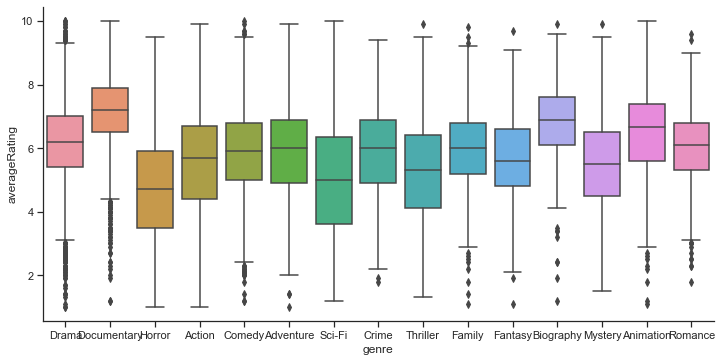

In [65]:
import seaborn as sns
sns.set_theme(style = "ticks", color_codes = True)
sns.catplot(x='genre', y='averageRating', data = rating, kind = "box", aspect=16/8)

#Post-pandemic ratings show Documentaries
#documentaries, overall had the btes ratings, along with animation, and drama 
# *note* 'biography' is commonly listed with drama and documentary. 


In [66]:
bio = genres.loc[genres['genres'].str.contains('Biography')]
bio

,genres,averageRating,numVotes,g1,g2,g3
282,"Biography,Documentary",9.6,86.0,Biography,Documentary,None
405,"Biography,Drama,History",6.3,263.0,Biography,Drama,History
414,"Action,Biography,Drama",8.8,98066.0,Action,Biography,Drama
433,"Biography,Crime,Drama",5.4,2797.0,Biography,Crime,Drama
515,"Action,Biography,Drama",5.3,33685.0,Action,Biography,Drama
...,...,...,...,...,...,...
16292,"Biography,Drama",7.7,1583.0,Biography,Drama,None
16297,"Biography,Drama",4.3,33.0,Biography,Drama,None
16337,"Biography,Documentary,Music",8.2,3856.0,Biography,Documentary,Music
16361,"Biography,Comedy,Drama",6.9,2288.0,Biography,Comedy,Drama


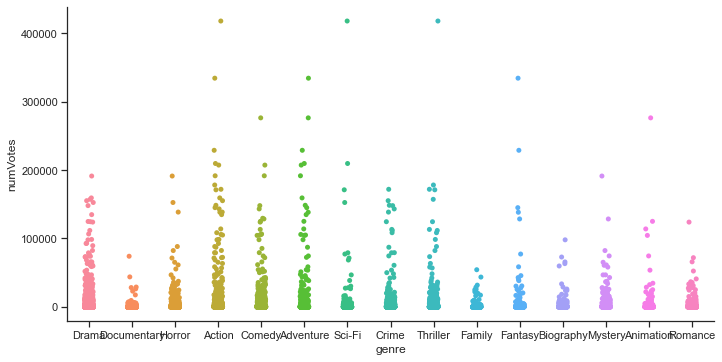

In [67]:
votes = genre[['numVotes', 'genre']]
sns.set_theme(style = "ticks", color_codes = True)
sns.catplot(x='genre', y='numVotes', data = votes, aspect=16/8)

## pre-pandemic data to see the relationship between genre and ratings

In [68]:
#read historical basics
old_title = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
old_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
old_region = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

In [69]:
#merge title and ratings
old = old_title.set_index('tconst').join(old_ratings.set_index('tconst'), how='left')

In [70]:
#join merged with region 
old = old.join(old_region.set_index('title_id'), how='left')

In [71]:
old.head(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,1.0,Sangharsh,IN,hi,NaN,alternative transliteration,0.0
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0,2.0,Sunghursh,NaN,NaN,original,NaN,1.0


In [72]:
old.tail(2)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,region,language,types,attributes,is_original_title
tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#filter for only US markets
old = old[old['region']=='US']

In [74]:
old = old.reset_index().rename(columns = {'index':'tconst'})

In [75]:
old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             51490 non-null  object 
 1   primary_title      51490 non-null  object 
 2   original_title     51489 non-null  object 
 3   start_year         51490 non-null  int64  
 4   runtime_minutes    43393 non-null  float64
 5   genres             50874 non-null  object 
 6   averagerating      30194 non-null  float64
 7   numvotes           30194 non-null  float64
 8   ordering           51490 non-null  float64
 9   title              51490 non-null  object 
 10  region             51490 non-null  object 
 11  language           548 non-null    object 
 12  types              6701 non-null   object 
 13  attributes         2458 non-null   object 
 14  is_original_title  51485 non-null  float64
dtypes: float64(5), int64(1), object(9)
memory usage: 5.9+ MB


In [76]:
#drop duplicate movies 
old = old.drop_duplicates(subset=['tconst'], keep='first')

In [77]:
old.shape

(47433, 15)

In [78]:
old['start_year'].value_counts().sort_index()

2010    4520
2011    4860
2012    5154
2013    5435
2014    5609
2015    5479
2016    5816
2017    5435
2018    3559
2019    1376
2020     149
2021      29
2022       7
2023       2
2024       1
2025       1
2027       1
Name: start_year, dtype: int64

In [79]:
old.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47433 entries, 0 to 51489
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             47433 non-null  object 
 1   primary_title      47433 non-null  object 
 2   original_title     47432 non-null  object 
 3   start_year         47433 non-null  int64  
 4   runtime_minutes    39673 non-null  float64
 5   genres             46840 non-null  object 
 6   averagerating      26654 non-null  float64
 7   numvotes           26654 non-null  float64
 8   ordering           47433 non-null  float64
 9   title              47433 non-null  object 
 10  region             47433 non-null  object 
 11  language           325 non-null    object 
 12  types              4977 non-null   object 
 13  attributes         1652 non-null   object 
 14  is_original_title  47428 non-null  float64
dtypes: float64(5), int64(1), object(9)
memory usage: 5.8+ MB


In [80]:
#keep data from the past two years
old = old[(old['start_year'] > 2016) & (old['start_year'] < 2020)]
old['start_year'].value_counts()

2017    5435
2018    3559
2019    1376
Name: start_year, dtype: int64

In [81]:
old.shape

(10370, 15)

In [82]:
oldgenres = old[['genres','averagerating']]

In [83]:
oldgenres['genres'].isna().sum()

122

In [84]:
#split the genres
split = oldgenres['genres'].str.split(",", expand = True)
oldgenres['one']= split[0]
oldgenres['two']= split[1]
oldgenres['three']= split[2]

<ipython-input-84-58fbf8cf5807>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oldgenres['one']= split[0]
<ipython-input-84-58fbf8cf5807>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oldgenres['two']= split[1]
<ipython-input-84-58fbf8cf5807>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [85]:
oldgenres.shape

(10370, 5)

In [86]:
oldgenres

,genres,averagerating,one,two,three
0,Drama,6.9,Drama,None,None
1,"Horror,Thriller",4.1,Horror,Thriller,None
3,Drama,4.0,Drama,None,None
27,"Adventure,Animation,Comedy",5.0,Adventure,Animation,Comedy
31,Horror,5.6,Horror,None,None
...,...,...,...,...,...
51485,Adventure,NaN,Adventure,None,None
51486,Drama,7.2,Drama,None,None
51487,"Comedy,Family,Fantasy",5.8,Comedy,Family,Fantasy
51488,Documentary,8.1,Documentary,None,None


In [87]:
o1 = oldgenres[['averagerating','one']].rename(columns={'one':'genre'})
o2 = oldgenres[['averagerating','two']].rename(columns={'two':'genre'})
o3 = oldgenres[['averagerating','three']].rename(columns={'three':'genre'})

In [88]:
old_genres = [o1,o2,o3]

In [89]:
oldgenres = pd.concat(old_genres)
oldgenres

,averagerating,genre
0,6.9,Drama
1,4.1,Horror
3,4.0,Drama
27,5.0,Adventure
31,5.6,Horror
...,...,...
51485,NaN,None
51486,7.2,None
51487,5.8,Fantasy
51488,8.1,None


In [90]:
oldgenres = oldgenres.dropna(subset = ['averagerating', 'genre'])

In [91]:
oldgenres.shape

(10401, 2)

In [92]:
old_counts = oldgenres['genre'].value_counts()

In [93]:
old_genre = oldgenres[~oldgenres['genre'].isin(old_counts[old_counts < 200].index)]
top = list(oldgenres['genre'].value_counts().index[:10])

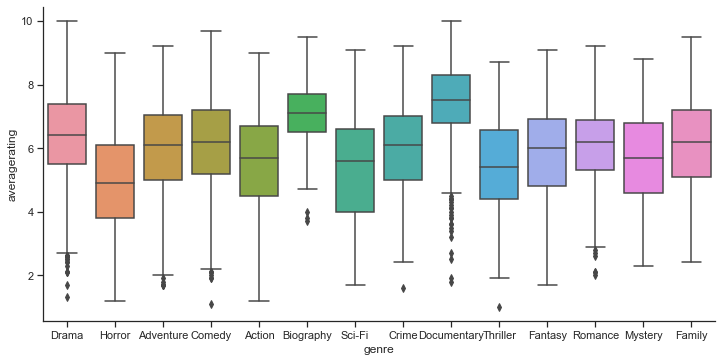

In [94]:
sns.set_theme(style = "ticks", color_codes = True)
sns.catplot(x='genre', y='averagerating', data = old_genre, kind = "box", aspect=16/8)

#pre-pandemic ratings 

# budget

In [95]:
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [96]:
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [97]:
budget.info()
#slice date to only year & make int
#remove commas and $ from amounts convert to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [98]:
budget['release_date'] = budget['release_date'].str[-4:]
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,2018,Red 11,"$7,000",$0,$0
5778,79,1999,Following,"$6,000","$48,482","$240,495"
5779,80,2005,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,2015,A Plague So Pleasant,"$1,400",$0,$0


In [99]:
budget['production_budget'] = budget['production_budget'].map(lambda x: x.replace(",","")).map(lambda x: x.replace("$",""))
budget['domestic_gross'] = budget['domestic_gross'].map(lambda x: x.replace(",","")).map(lambda x: x.replace("$",""))
budget['worldwide_gross'] = budget['worldwide_gross'].map(lambda x: x.replace(",","")).map(lambda x: x.replace("$",""))

In [100]:
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009,Avatar,425000000,760507625,2776345279
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019,Dark Phoenix,350000000,42762350,149762350
3,4,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,2018,Red 11,7000,0,0
5778,79,1999,Following,6000,48482,240495
5779,80,2005,Return to the Land of Wonders,5000,1338,1338
5780,81,2015,A Plague So Pleasant,1400,0,0


In [101]:
#concatenate to create a mergeid
budget['mergeid'] = budget['release_date'] +" " + budget['movie']

In [102]:
#concatenate to create a mergeid
old['mergeid'] = old['start_year'].astype(str) + " " + old['title']

In [103]:
#cleanup mergeid to see if we can capture more connections
budget['mergeid'] = budget['mergeid'].map(lambda x: x.replace(" ","")).map(lambda x: x.lower())
budget['mergeid'] = budget['mergeid'].map(lambda x: x.replace(":","")).map(lambda x: x.replace("&",""))
budget['mergeid'] = budget['mergeid'].map(lambda x: x.replace(".",""))

In [104]:
old['mergeid'] = old['mergeid'].map(lambda x: x.replace(" ","")).map(lambda x: x.lower())
old['mergeid'] = old['mergeid'].map(lambda x: x.replace(":","")).map(lambda x: x.replace("&",""))
old['mergeid'] = old['mergeid'].map(lambda x: x.replace(".",""))

In [105]:
#merge budget dataframe and oldmovie data frame together
money_merge = old.set_index('mergeid').join(budget.set_index('mergeid'), how='left')

In [106]:
#rest the index
money_merge = money_merge.reset_index()

In [107]:
#drop values that do not contain budget information
money_merge.dropna(subset=['production_budget'], inplace=True)

association with genre and budget? 

In [108]:
#filtering columns
money_merge = money_merge[['mergeid','genres','averagerating','production_budget', 'domestic_gross','worldwide_gross']]

In [109]:
money_merge['genres'] = money_merge['genres'].map(lambda x: x.replace(", ", ","))

In [110]:
#split the genres
gsplit = money_merge['genres'].str.split(",", expand = True)
money_merge['one']= gsplit[0]
money_merge['two']= gsplit[1]
money_merge['three']= gsplit[2]

In [111]:
money_merge

,mergeid,genres,averagerating,production_budget,domestic_gross,worldwide_gross,one,two,three
107,2017abadmomschristmas,"Adventure,Comedy",5.5,28000000,72110659,127710550,Adventure,Comedy,None
200,2017aghoststory,"Drama,Fantasy,Romance",6.8,100000,1594798,2769782,Drama,Fantasy,Romance
228,2017aliencovenant,"Horror,Sci-Fi,Thriller",6.4,97000000,74262031,238521247,Horror,Sci-Fi,Thriller
248,2017alleyezonme,"Biography,Drama,Music",5.8,45000000,44922302,54876855,Biography,Drama,Music
257,2017allsaints,Drama,6.0,2000000,5802208,5941994,Drama,None,None
...,...,...,...,...,...,...,...,...,...
10270,2019uglydolls,"Adventure,Animation,Comedy",4.5,45000000,19894664,24644664,Adventure,Animation,Comedy
10280,2019unplanned,"Biography,Drama",6.3,6000000,18107621,18107621,Biography,Drama,None
10298,2019us,"Horror,Mystery,Thriller",7.1,20000000,175006930,254210310,Horror,Mystery,Thriller
10303,2019velvetbuzzsaw,"Horror,Mystery,Thriller",5.7,21000000,0,0,Horror,Mystery,Thriller


In [112]:
m1 = money_merge[['mergeid', 'production_budget','domestic_gross', 'worldwide_gross', 'one']].rename(columns = {'one':'genre'})
m2 = money_merge[['mergeid', 'production_budget','domestic_gross', 'worldwide_gross', 'two']].rename(columns = {'two':'genre'})
m3 = money_merge[['mergeid', 'production_budget','domestic_gross', 'worldwide_gross', 'three']].rename(columns = {'three':'genre'})

In [113]:
mlist = [m1, m2, m3]
genres_and_money = pd.concat(mlist)

In [114]:
#converting to integers
genres_and_money = genres_and_money.astype({'production_budget':'int', 'domestic_gross': 'int', 'worldwide_gross':'int'})
genres_and_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 107 to 10329
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   mergeid            654 non-null    object
 1   production_budget  654 non-null    int32 
 2   domestic_gross     654 non-null    int32 
 3   worldwide_gross    654 non-null    int32 
 4   genre              578 non-null    object
dtypes: int32(3), object(2)
memory usage: 23.0+ KB


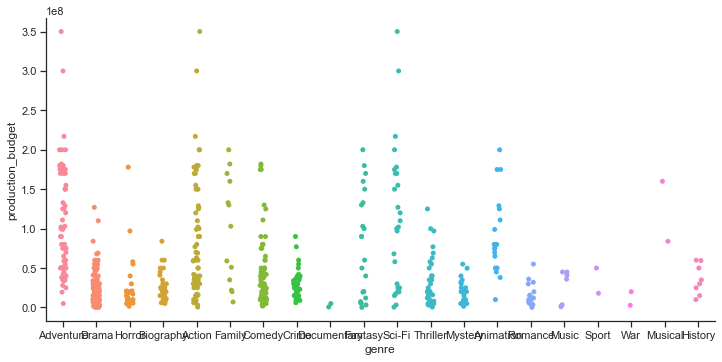

In [115]:
production = genres_and_money[['production_budget', 'genre']]
sns.set_theme(style = "ticks", color_codes = True)
sns.catplot(x='genre', y='production_budget', data = production, aspect=20/10)

In [116]:
#can we make a pivot table where each genre is a column and the budget info is below? 

# Is there a correlation between production budget and rating? 

In [117]:
#create dataframe
rating_and_budget = money_merge[['averagerating', 'production_budget']]

In [118]:
#drop nulls
rating_and_budget.dropna(subset =['averagerating'], inplace = True)

<ipython-input-118-8e18530e1496>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_and_budget.dropna(subset =['averagerating'], inplace = True)


In [119]:
rating_and_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 107 to 10329
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   averagerating      212 non-null    float64
 1   production_budget  212 non-null    object 
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


In [120]:
#strings to numbers
rating_and_budget['averagerating'] = rating_and_budget['averagerating'].astype(float)

<ipython-input-120-243d963dbabc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_and_budget['averagerating'] = rating_and_budget['averagerating'].astype(float)


In [121]:
rating_and_budget['production_budget'] = rating_and_budget['production_budget'].astype(int)

<ipython-input-121-7abfc61dc1db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_and_budget['production_budget'] = rating_and_budget['production_budget'].astype(int)


In [122]:
#correlation between averagerating and production budget is weak
rating_and_budget.corr()

,averagerating,production_budget
averagerating,1.000000,0.176844
production_budget,0.176844,1.000000


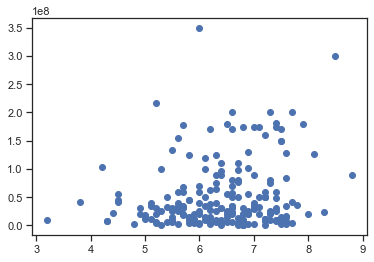

In [123]:
x= rating_and_budget['averagerating']
y= rating_and_budget['production_budget']

fig, ax = plt.subplots()
ax.scatter(x,y)

# 